<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Обзор данных

Импортируем необходимые библиотеки и откроем полученные файлы

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
df_train.isna().mean()

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
df_test.isna().mean()

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Много пропущенных значений, по условию задачи соседние по времени параметры часто похожи. Заменим недостающие значения на соседние

In [8]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())
print(df_full.isna().sum().sum())

0
0
0


Готово. Далее проверим, что эффективность обогащения рассчитана правильно.

In [9]:
df_train['mae_recovery'] = (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au']-
    df_train['rougher.output.tail_au'])) / (df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au']-
  df_train['rougher.output.tail_au'])) * 100
print('MAE составило', mean_absolute_error(df_train['rougher.output.recovery'], df_train['mae_recovery']))

MAE составило 9.73512347450521e-15


Достаточно низкий показатель, значит recovery рассчитан верно

При обзоре данных мы заметили, что в тестовой выборке отсутсвует часть признаков. Для тестирования модели необходимо наличие всех признаков обучающей выборки, посмотрим каких параметров не хватает

In [10]:
display(set(df_train.columns) - set(df_test.columns))

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'mae_recovery',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 '

В тестовой выборке не хватает тех признаков которые не могут быть посчитаны до получения финальных сплавов. Из обучающей выборки их нужно удалить, кроме  final.output.recovery, rougher.output.recovery, эти признаки добавим в тестовую выборку

### Предобработка данных

Пропуски мы уже заполнили осталось добавить недостающие столбцы в тестовую выборку

In [11]:
df_full = df_full.set_index('date')
df_test = df_test.set_index('date')
df_test['final.output.recovery'] = df_full['final.output.recovery']
df_test['rougher.output.recovery'] = df_full['rougher.output.recovery']
print(df_test['final.output.recovery'].head())
print(df_full['final.output.recovery'].head())

date
2016-09-01 00:59:59    70.273583
2016-09-01 01:59:59    68.910432
2016-09-01 02:59:59    68.143213
2016-09-01 03:59:59    67.776393
2016-09-01 04:59:59    61.467078
Name: final.output.recovery, dtype: float64
date
2016-01-15 00:00:00    70.541216
2016-01-15 01:00:00    69.266198
2016-01-15 02:00:00    68.116445
2016-01-15 03:00:00    68.347543
2016-01-15 04:00:00    66.927016
Name: final.output.recovery, dtype: float64


In [12]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


Столбцы недостающие в тестовой выборке удалим перед обучением модели, в процессе анализа они нам еще понадобятся. 

## Анализ данных

Проанализируем как меняется концентрация металлов на разных этапах очистки, для этого построим графики для каждого металла

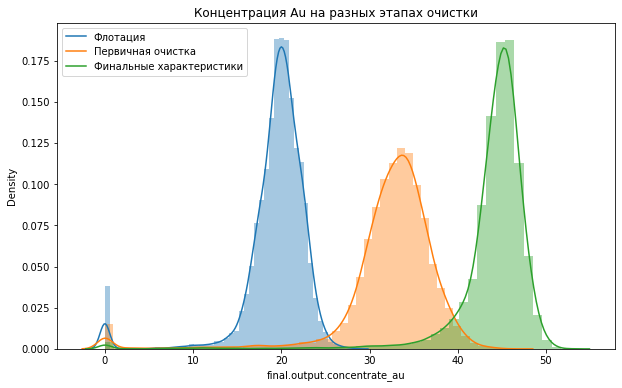

In [13]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df_train['rougher.output.concentrate_au'])
sns.distplot(df_train['primary_cleaner.output.concentrate_au'])
sns.distplot(df_train['final.output.concentrate_au'])
plt.title('Концентрация Au на разных этапах очистки')
plt.legend(labels=['Флотация','Первичная очистка', 'Финальные характеристики'])
plt.show()

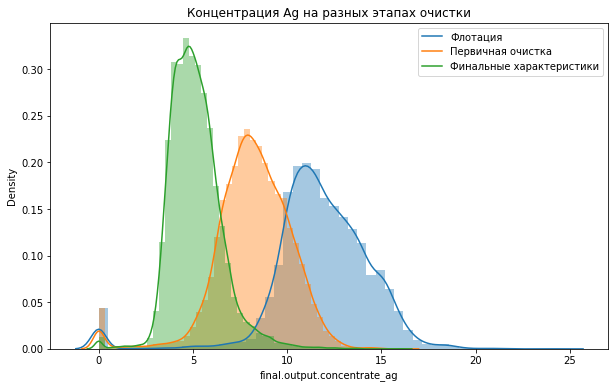

In [14]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df_train['rougher.output.concentrate_ag'])
sns.distplot(df_train['primary_cleaner.output.concentrate_ag'])
sns.distplot(df_train['final.output.concentrate_ag'])
plt.title('Концентрация Ag на разных этапах очистки')
plt.legend(labels=['Флотация','Первичная очистка', 'Финальные характеристики'])
plt.show()

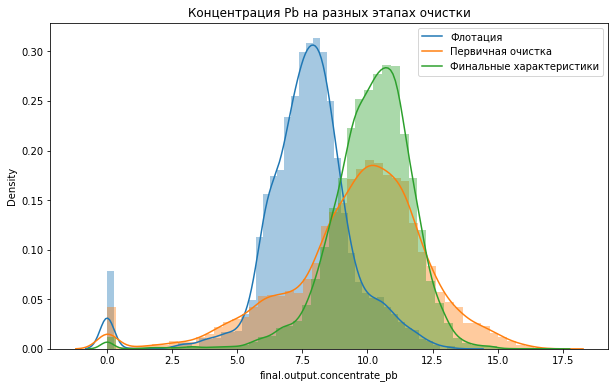

In [15]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df_train['rougher.output.concentrate_pb'])
sns.distplot(df_train['primary_cleaner.output.concentrate_pb'])
sns.distplot(df_train['final.output.concentrate_pb'])
plt.title('Концентрация Pb на разных этапах очистки')
plt.legend(labels=['Флотация','Первичная очистка', 'Финальные характеристики'])
plt.show()

Конценртация золота и свинца на этапе флотации и финальном этапе выше чем после первичной очистки, концентрация серебра на каждом этапе снижается. На всех графиках наблюдается аномальное значение около 0.

 Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

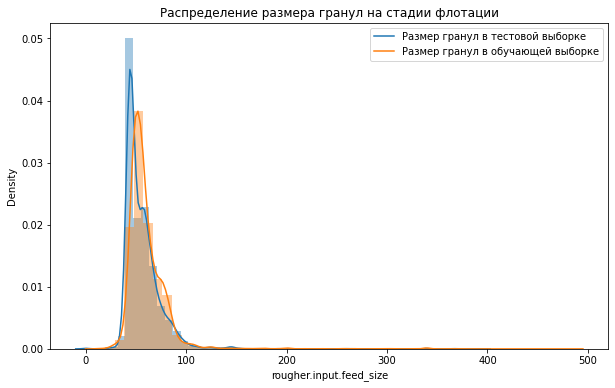

In [16]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df_test['rougher.input.feed_size'])
sns.distplot(df_train['rougher.input.feed_size'])
plt.title('Распределение размера гранул на стадии флотации')
plt.legend(labels=['Размер гранул в тестовой выборке','Размер гранул в обучающей выборке'])
plt.show()

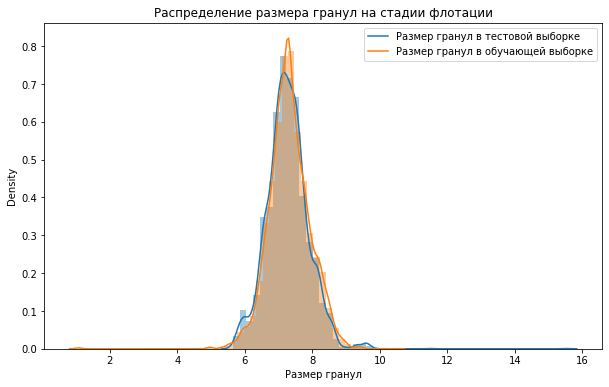

In [17]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df_test['primary_cleaner.input.feed_size'])
sns.distplot(df_train['primary_cleaner.input.feed_size'])
plt.title('Распределение размера гранул на стадии флотации')
plt.xlabel('Размер гранул')
plt.legend(labels=['Размер гранул в тестовой выборке','Размер гранул в обучающей выборке'])
plt.show()

На графиках видно, что распределения размеров гранул сырья на тестовой и обучающей выборках не имеют значительных отличий.

 Исследуем суммарную концентрацию всех веществ на разных стадиях

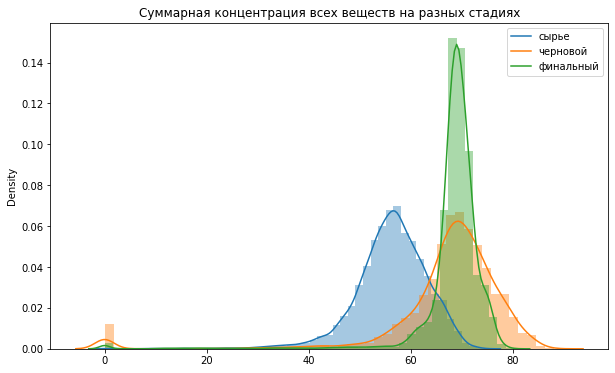

In [18]:
sum_rougher = (df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol'] + df_train['rougher.input.feed_au'])
sum_primary = (df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'] + df_train['rougher.output.concentrate_au'])
sum_final = (df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'] + df_train['final.output.concentrate_au'])
fig = plt.figure(figsize=(10,6))
sns.distplot(sum_rougher)
sns.distplot(sum_primary)
sns.distplot(sum_final)
plt.legend(labels=['сырье','черновой','финальный'])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.show()

Значение концентраций веществ на начальном этапе меньше чем после флотаций и в финальном концентраций . В финальном этапе распределение стремится к нормальному, что свиделтсвует о работе технологического процесса. 

Готово!

## Модель

Функция для вычисления итоговой sMAPE

In [19]:
def smape (target, predictions):
    numerator = abs(predictions - target)
    denominator = (abs(target) + abs(predictions)) / 2
    summa = (numerator / denominator).sum()
    smape = (1 / len(target)) * summa * 100
    return smape

In [20]:
def fin_smape(target, predictions):
    return .25 * smape(target[:, 0], predictions[:,0]) + .75 * smape(target[:, 1], predictions[:, 1])

Готово!

Удалим столбец с датой

In [21]:
df_train = df_train.drop(set(df_train.columns) - set(df_test.columns), axis=1)

Необходимо обучить разные модели и оценить их качество кросс-валидацией

In [22]:
features_train = df_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train = df_train[['rougher.output.recovery','final.output.recovery']]
features_test = df_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_test = df_test[['rougher.output.recovery','final.output.recovery']]

Проведем масштабирование

In [23]:
ss = StandardScaler()
features_train = ss.fit_transform(features_train)
features_test = ss.transform(features_test)
target_train = np.array(target_train)
target_test = np.array(target_test)

Обучение моделей

In [24]:
smape_score = make_scorer(fin_smape,greater_is_better = False)
model = LinearRegression()
smape_lr = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_score).mean()
print(smape_lr)

-12.38459610484721


In [67]:
model = RandomForestRegressor(random_state=12345)
parametrs = {'n_estimators': range (30,50,70)}

gr_model = GridSearchCV(model, parametrs, cv=5, n_jobs=-1, scoring=smape_score)
gr_model.fit(features_train, target_train)

print(gr_model.best_score_)
print(gr_model.best_params_)

-12.33643684371671
{'n_estimators': 30}


In [25]:
model =DecisionTreeRegressor(random_state=12345)
parametrs = {'max_depth': range(4, 7, 10)}

gr_model = GridSearchCV(model, parametrs, cv=5, n_jobs=-1, scoring=smape_score)
gr_model.fit(features_train, target_train)

print(gr_model.best_score_)
print(gr_model.best_params_)

-11.008386560119696
{'max_depth': 4}


Лучший показатель у модели Дерево решений

Проверим лучшую модель на тестовой выборке

In [26]:
model =DecisionTreeRegressor(random_state=12345, max_depth=4)
model.fit(features_train, target_train)
pred_test = model.predict(features_test)
print(fin_smape(target_test, pred_test))

9.770087850011732


In [27]:
dummy_mod = DummyRegressor(strategy='mean')
dummy_mod.fit(features_train,target_train)
pred = dummy_mod.predict(features_test)
print(fin_smape(target_test, pred))

10.289630376021035


Готово!

## Вывод

Перед нами стояла задача построить модель которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этого были выполнены следующие задания:
1. Провели обзор полученных данных и проверили, что эффективность обогащения рассчитана правильно
2. Проанализировали тестовую и обучающую выборки, обнаружили недостающие признаки в тесте и добавили их
4. Проанализировали данные и приступили к обучению модели
5. Обучили 3 разные модели и оценили их качество кросс-валидацией, лучший результат показала модель Дерево решений